In [79]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']


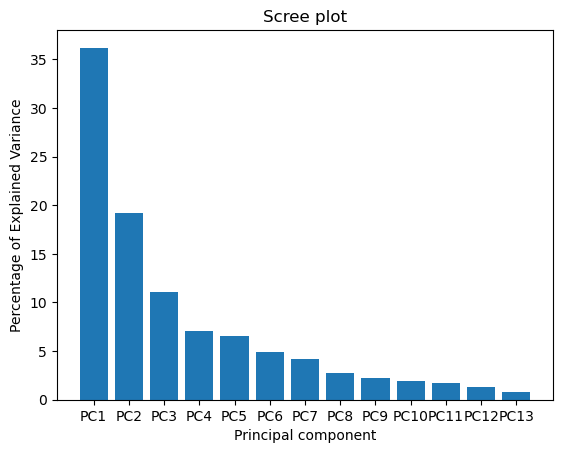

178
178


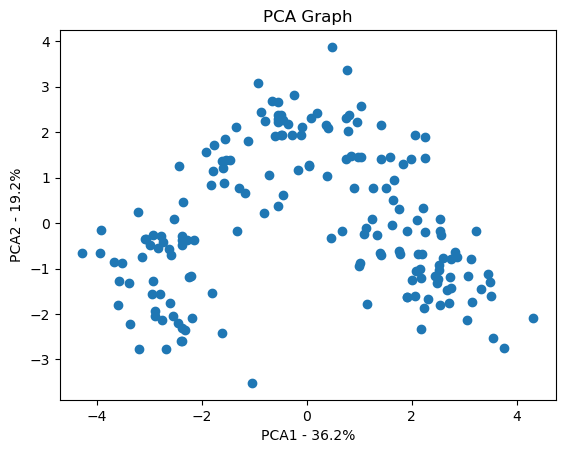

In [87]:
#Import, scale, perform PCA and plot data
colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

data = pd.read_csv('WINE.txt', names=colnames, usecols=['2','3','4','5','6','7','8','9','10','11','12','13','14'], delimiter=r"\s+")

#data['WINE.txt'] = data['WINE.txt'].astype(float)
data.head()
#Scales and centers data

scaled_data = preprocessing.scale(data)
#creates PCA object and performs the pca calculations
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)

#plots the PC's
labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
print(labels)

plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

print(len(pca_data))
print(len(data))
pca_data = pd.DataFrame(pca_data, index = range(1,len(data)+1), columns = labels)
plt.scatter(pca_data.PC1, pca_data.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))



#for sample in pca_df index:
 #   plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()